## Fitting drug response curves with sigmoid function

In [1]:
import pandas as pd
import numpy as np


from tqdm import tqdm
import warnings
from fitting import *

warnings.filterwarnings("ignore")
_FOLDER = "data/"
_FOLDER_2 = "figures/"

## Fitting data

In [3]:
df = pd.read_csv("results/filt_auc_02.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]
df.columns

Index(['CELL_LINE_NAME', 'COSMIC_ID', 'DRUG_ID', 'DRUGID_COSMICID',
       'FOLD_DILUTION', 'MAX_CONC', 'fd_num_0', 'fd_num_1', 'fd_num_2',
       'fd_num_3', 'fd_num_4', 'fd_num_5', 'fd_num_6', 'fd_num_7', 'fd_num_8',
       'fd_num_9', 'norm_cells_0', 'norm_cells_1', 'norm_cells_2',
       'norm_cells_3', 'norm_cells_4', 'norm_cells_5', 'norm_cells_6',
       'norm_cells_7', 'norm_cells_8', 'norm_cells_9', 'drug_name', 'CCL_name',
       'auc', 'spearman_r', 'count_missing'],
      dtype='object')

### sigmoid_4_param

In [4]:
%%time
fitting_function = "sigmoid_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]>0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
print("Number of samples with fitting <0.1:", df[df[fitting_function+"_r2"]<0.1].shape[0])
print("")

100%|██████████| 12169/12169 [01:14<00:00, 163.58it/s]

R2>0: (8253, 33)
R2>0.9 7769
Number of samples with fitting <0.1: 385

CPU times: user 1min 14s, sys: 298 ms, total: 1min 14s
Wall time: 1min 14s


### sigmoid_2_param

100%|██████████| 8253/8253 [00:05<00:00, 1395.11it/s]


R2>0: (8253, 35)
R2>0.9 7364
CPU times: user 6.06 s, sys: 27.8 ms, total: 6.09 s
Wall time: 6.05 s


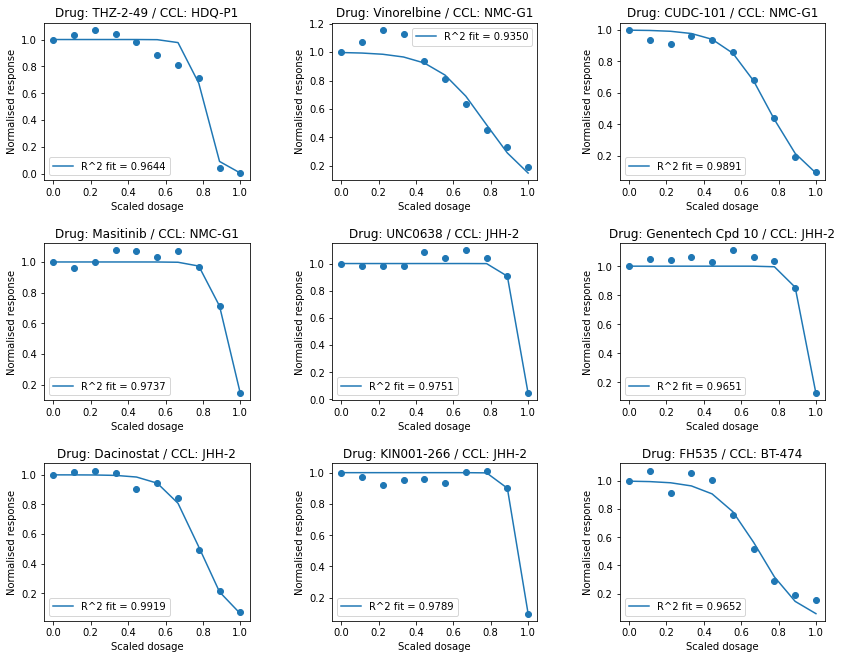

In [7]:
%%time
fitting_function = "sigmoid_2_param" 
# "sigmoid_Wang" we don't need default_param_number
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_3_param

100%|██████████| 8253/8253 [00:09<00:00, 829.46it/s]


R2>0: (8230, 37)
R2>0.9 8024
CPU times: user 10.1 s, sys: 52.1 ms, total: 10.2 s
Wall time: 10.1 s


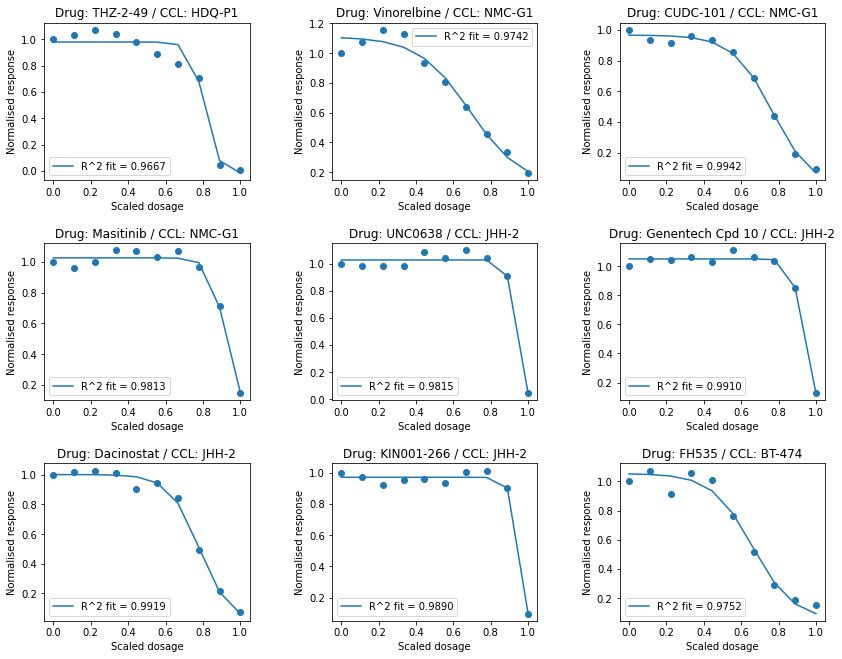

In [8]:
%%time
fitting_function = "sigmoid_3_param"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### fsigmoid

100%|██████████| 8230/8230 [00:06<00:00, 1263.60it/s]


(8228, 39)


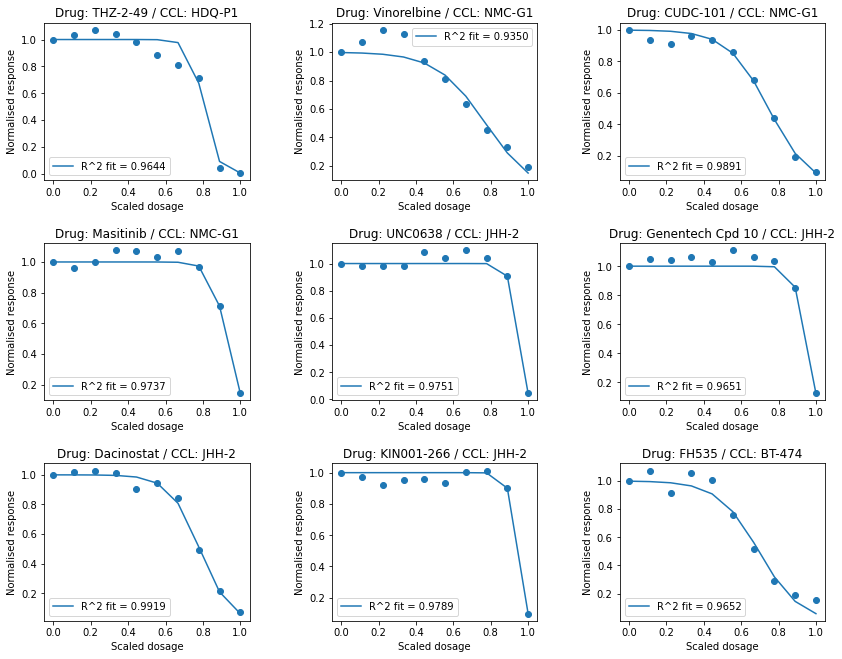

In [9]:
# %%time
fitting_function = "fsigmoid"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print(df.shape)

ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logistic_4_param

100%|██████████| 8228/8228 [00:19<00:00, 432.02it/s]


R2>0: (7955, 41)
R2>0.9 7826
CPU times: user 19.2 s, sys: 116 ms, total: 19.3 s
Wall time: 19.2 s


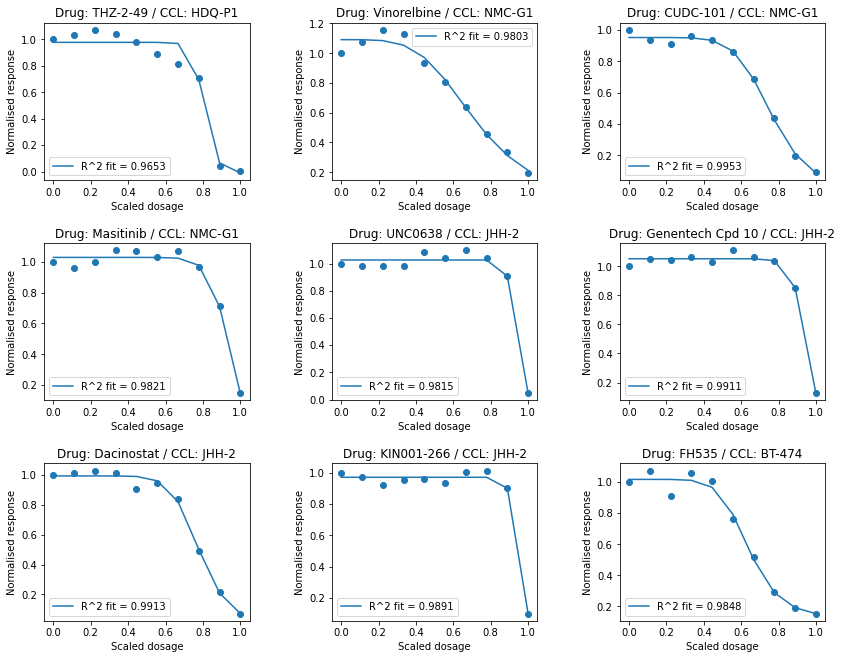

In [10]:
%%time
fitting_function = "logistic_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

In [11]:
df[df["logistic_4_param_r2"]>0.9][["logistic_4_param", "logistic_4_param_r2"]]

,logistic_4_param,logistic_4_param_r2
0,"[0.9774450987355412, 24.96036737129365, 0.8071...",0.965288
1,"[1.090721306636655, 4.363214591513284, 0.71668...",0.980308
2,"[0.9519808581142127, 7.38988484774411, 0.76256...",0.995272
3,"[1.0297610666356982, 15.434149447760161, 0.958...",0.982129
4,"[1.026301462512543, 113.35230995668225, 0.9044...",0.981481
...,...,...
12161,"[1.0579706059887846, 5.389878728800332, 0.6206...",0.985137
12163,"[1.1001143737460704, 13.464318774201681, 0.751...",0.955672
12165,"[1.0469381551691272, 27.71883794831238, 0.6496...",0.997741
12166,"[0.9644769763939872, 11.99353765196583, 0.7148...",0.987249


### LL4_4_param

100%|██████████| 7955/7955 [00:19<00:00, 417.15it/s]


R2>0: (7911, 43)
R2>0.9 7783
CPU times: user 19.3 s, sys: 105 ms, total: 19.4 s
Wall time: 19.3 s


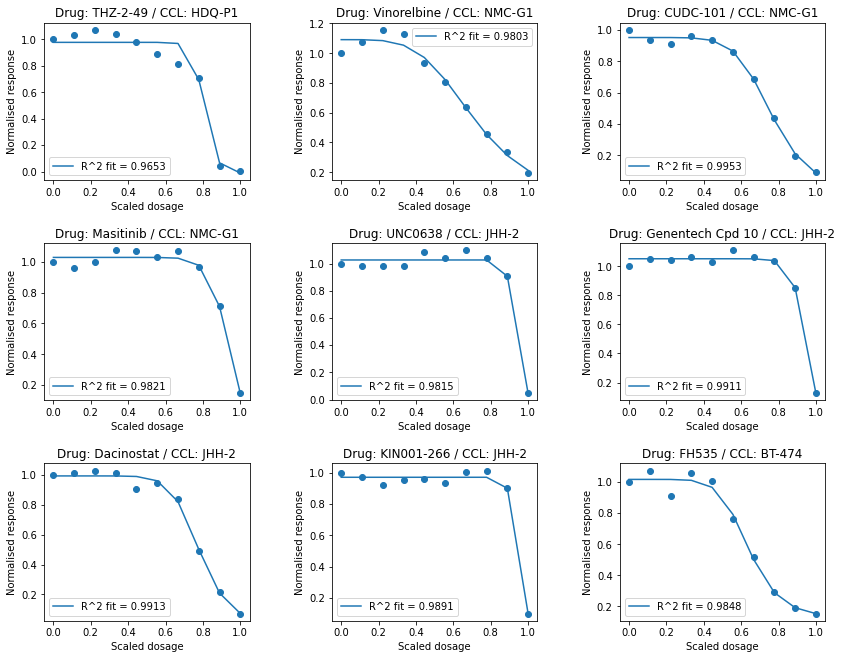

In [12]:
%%time
fitting_function = "ll4_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### ll4R_4_param

100%|██████████| 7911/7911 [00:17<00:00, 443.42it/s]


R2>0: (7772, 45)
R2>0.9 7649
CPU times: user 18 s, sys: 88.5 ms, total: 18.1 s
Wall time: 18 s


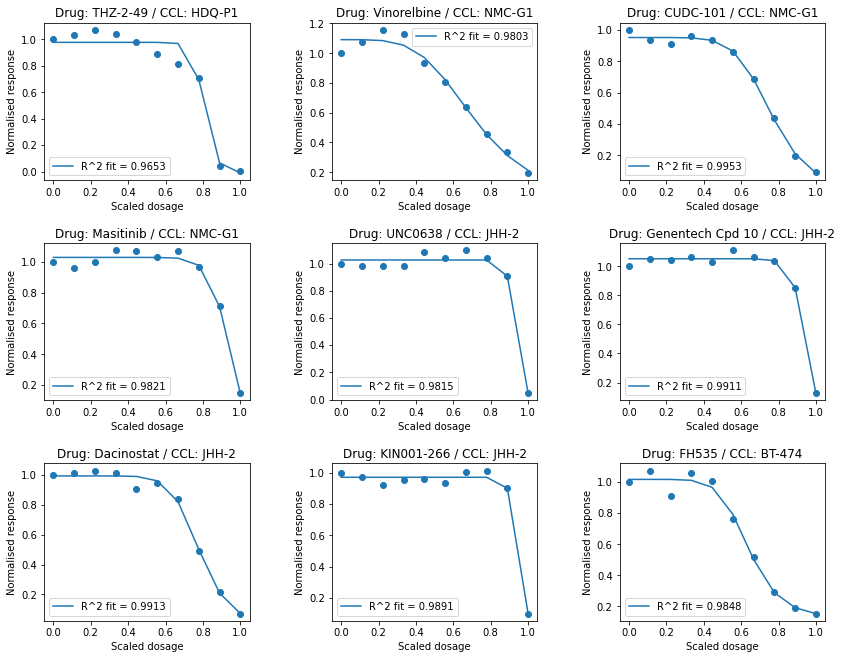

In [13]:
%%time
fitting_function = "ll4R_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logLogist_3_param

100%|██████████| 7772/7772 [00:20<00:00, 377.35it/s]


R2>0: (7574, 47)
R2>0.9 7113
CPU times: user 20.8 s, sys: 96.5 ms, total: 20.9 s
Wall time: 20.7 s


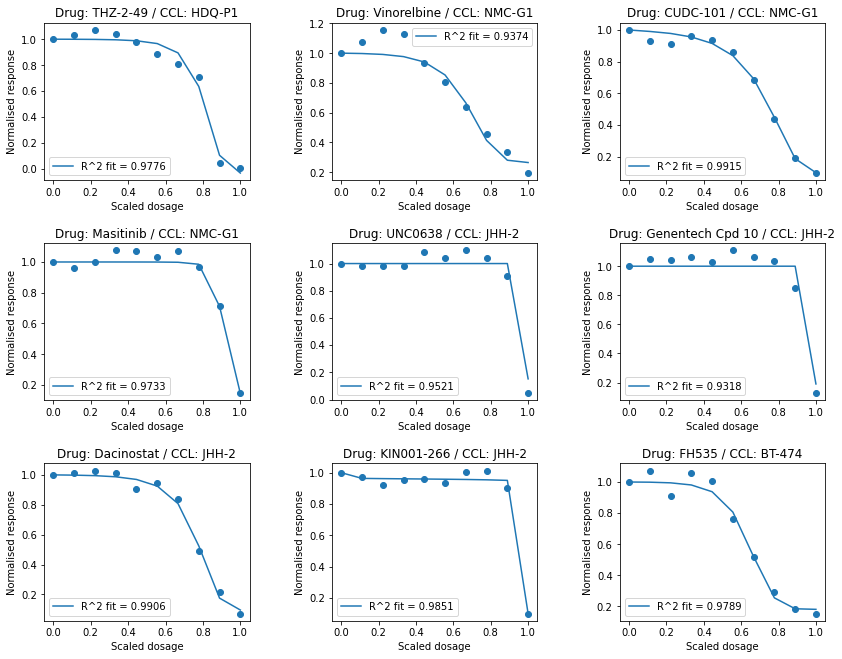

In [14]:
%%time
fitting_function = "logLogist_3_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

## Comparison of fitting models

In [15]:
functions = {"fsigmoid", 
             "sigmoid_2_param",
             "sigmoid_3_param",
             "sigmoid_4_param",
             "logistic_4_param",
            "ll4_4_param",
            "ll4R_4_param",
            "logLogist_3_param"}

functions_dict= dict(list(enumerate(functions)))
r2_columns = [fitting_function+"_r2" for fitting_function in functions]

In [16]:
df["better_fitting"] = np.argmax(df[r2_columns].values, axis=1)
r2_col_res = r2_columns +["better_fitting"]
df["better_fitting"] = df["better_fitting"].map(functions_dict)
df[r2_col_res].head()

,fsigmoid_r2,logistic_4_param_r2,ll4_4_param_r2,ll4R_4_param_r2,sigmoid_2_param_r2,sigmoid_3_param_r2,logLogist_3_param_r2,sigmoid_4_param_r2,better_fitting
0,0.964416,0.965288,0.965288,0.965288,0.964416,0.966673,0.977597,0.966718,logLogist_3_param
1,0.935012,0.980308,0.980308,0.980308,0.935012,0.974226,0.937392,0.974905,ll4_4_param
2,0.989093,0.995272,0.995272,0.995272,0.989093,0.994160,0.991522,0.995441,sigmoid_4_param
3,0.973737,0.982129,0.982129,0.982129,0.973737,0.981305,0.973334,0.981916,ll4R_4_param
4,0.975088,0.981481,0.981481,0.981481,0.975088,0.981472,0.952086,0.981481,ll4R_4_param


In [17]:
df["better_fitting"].value_counts()

sigmoid_4_param      2214
ll4R_4_param         1544
ll4_4_param          1283
logLogist_3_param    1268
logistic_4_param     1242
sigmoid_3_param        23
Name: better_fitting, dtype: int64

In [18]:
r2_limit = 0.98
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.98
logistic_4_param,4831
ll4_4_param,4830
ll4R_4_param,4830
sigmoid_4_param,4792
sigmoid_3_param,4100
logLogist_3_param,3624
fsigmoid,2787
sigmoid_2_param,2770


In [19]:
r2_limit = 0.95
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.95
logistic_4_param,6869
ll4_4_param,6869
ll4R_4_param,6869
sigmoid_4_param,6763
sigmoid_3_param,6584
logLogist_3_param,5961
fsigmoid,5468
sigmoid_2_param,5434


In [20]:
r2_limit = 0.9
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.9
logistic_4_param,7471
ll4_4_param,7471
ll4R_4_param,7471
sigmoid_3_param,7408
sigmoid_4_param,7275
logLogist_3_param,7113
fsigmoid,6877
sigmoid_2_param,6857


In [21]:
df.shape

(7574, 48)

In [23]:
df.to_csv("results/fit_auc_02.csv", index=False)